In [1]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
nlp = spacy.load("en_core_web_sm")

### Reading reddit thread data into dataframes and extracting comments, body and title into csv file 

In [36]:
df1 = pd.read_csv('aston_martin_thread1.csv', index_col=0)
df1.head()

,id,title,score,comms_num,comments,search_topic,body
0,u0d69d,"[Sky Sports F1] ""There's too many things going...",274,116,['How could they f*ck up so hard with the car?...,formula1,NaN
1,u0k44k,Verstappen: Aston Martin F1 safety car ‘like a...,7290,793,"['“Then, to be honest, I wanted to complain, b...",formula1,NaN
2,u0e8zz,"Russell - ""The Mercedes AMG is like five secon...",5314,428,"['Someone wants a new company car.', ""I'm defi...",formula1,NaN
3,u0bxr4,[Philip Horton] Alex Albon's late-stopping str...,6270,393,['Perez dodged a 50 caliber bullet and Vettel ...,formula1,NaN
4,tyhdk9,[Tobi Grüner] VW board supports Audi/Porsche F...,3279,586,['Would be massive if Sauber can strike a work...,formula1,NaN


### Comments

In [37]:
df1.comments[0]

'[\'How could they f*ck up so hard with the car?\', \'Alternative link? Sky apparently has regional filter turned on\', \'I thought moving away from Ferrari would bring the best out of Seb but Aston Martin is nothing but a joke probably worse than 2020 Ferrari\', "He\'s driving the F14T V2. Except this time around the car isn\'t even a semi fast tractor. Its just a tractor.", "I\'ll take this pain for 6 races if that b-spec is a demigod", \'[Vettel explaining to his engineers what he feels is wrong with the car.](https://youtu.be/xUlJ_6WHfh8)\', "It\'s gonna be his last season.", \'Oh how I wish he would go to Alfa Romeo or Haas instead of Aston Martin.\', \'Has any driver retired mid season?\\n\\nHe should pack up and leave...\', \'I think he is talking about the management of the team as well\', \'I think he will complete the season but retirement is clearly on the table now.\', \'Anyone got a mirror please?\', \'"The front wing, rear wing, engine, gearbox, the advanced energy recove

In [38]:
df1.comments[0].split("', '")[1]

'Alternative link? Sky apparently has regional filter turned on'

### Cleaning and creating a corpus document for word cloud

In [39]:
bow_comments=[]
sentence_list = []
for row in df1.comments:
    for comment in row.split("', '"):
        sentence_list.append(comment)
        for word in comment.split(' '):
            bow_comments.append(word)

In [ ]:
bow=[]
for sentence in sentence_list:
    doc = nlp(sentence)

    for token in doc:
        if token.is_stop == False and token.is_alpha==True:
            bow.append((token.lemma_).lower())
comment_text = ' '.join(word for word in bow)

In [87]:
bow_comments=[]
sentence_list = []
for row in df1.comments[0].split("', '"):
        sentence_list.append(row)
        for word in row.split(' '):
            bow_comments.append(word)
    

In [89]:
bow=[]
for sentence in sentence_list:
    doc = nlp(sentence)

    for token in doc:
        if token.is_stop == False and token.is_alpha==True:
            bow.append((token.lemma_).lower())
comment_text = ' '.join(word for word in bow)

In [70]:
bow_single=[]
for sentence in sentence_list_single:
    doc = nlp(sentence)

    for token in doc:
        if token.is_stop == False and token.is_alpha==True:
            bow.append((token.lemma_).lower())
comment_text_single = ' '.join(word for word in bow_single)

In [99]:
newStop=['sebastian','vettel','weekend','race','driver','team','weekend','aston','martin','seb','car','year','new','grand pix','like','season','think','saudiarabiangp']

### Aston Martin Reddit wordcloud

In [101]:
def generate_wordcloud(text, stopwords=newStop):
    wordcloud = WordCloud(collocations=True,
                          width=1600,
                          height=1000,
                          colormap='Accent',
                          background_color='black',
                          stopwords=stopwords).generate(text)
    plt.figure(figsize=[20,15])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

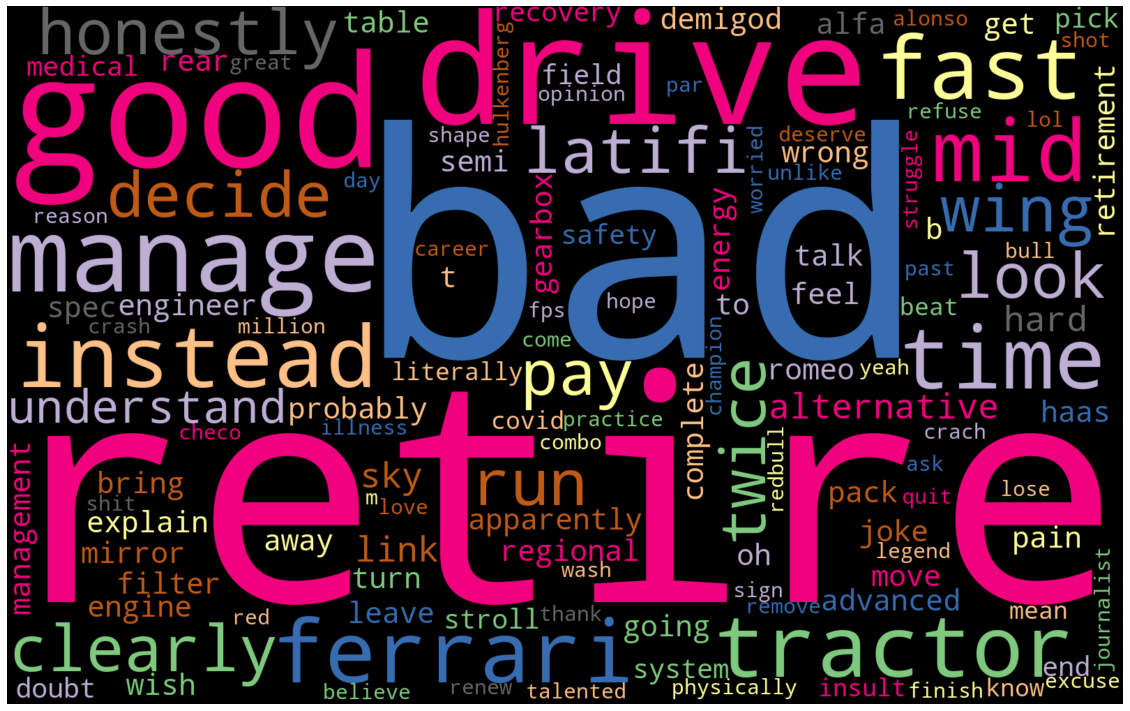

In [94]:
generate_wordcloud(comment_text) 

### Aston Martin Twitter wordcloud

In [95]:
file_text = open("AstonMartinSUnique.txt", "r")
text="".join(word for word in file_text)

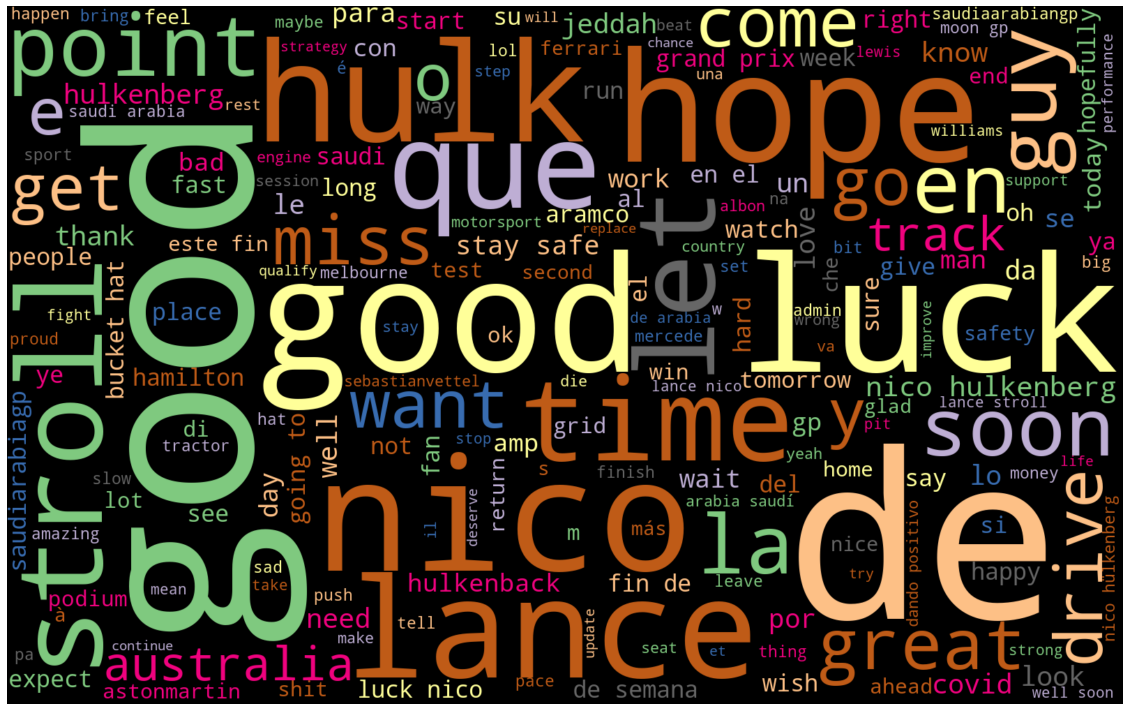

In [102]:
generate_wordcloud(text)## twitter aston martin